<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [42]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [43]:
df= pd.read_csv('/home/dsi-student/Desktop/ECON628-01-jkemler21/datasets/sleep/sleep_bh.csv')

In [44]:
df.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [45]:
df = sleep.dropna()

In [46]:
df.isnull().sum()

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64

## 3. Check for correlations
    Implement a correlation heatmap
---

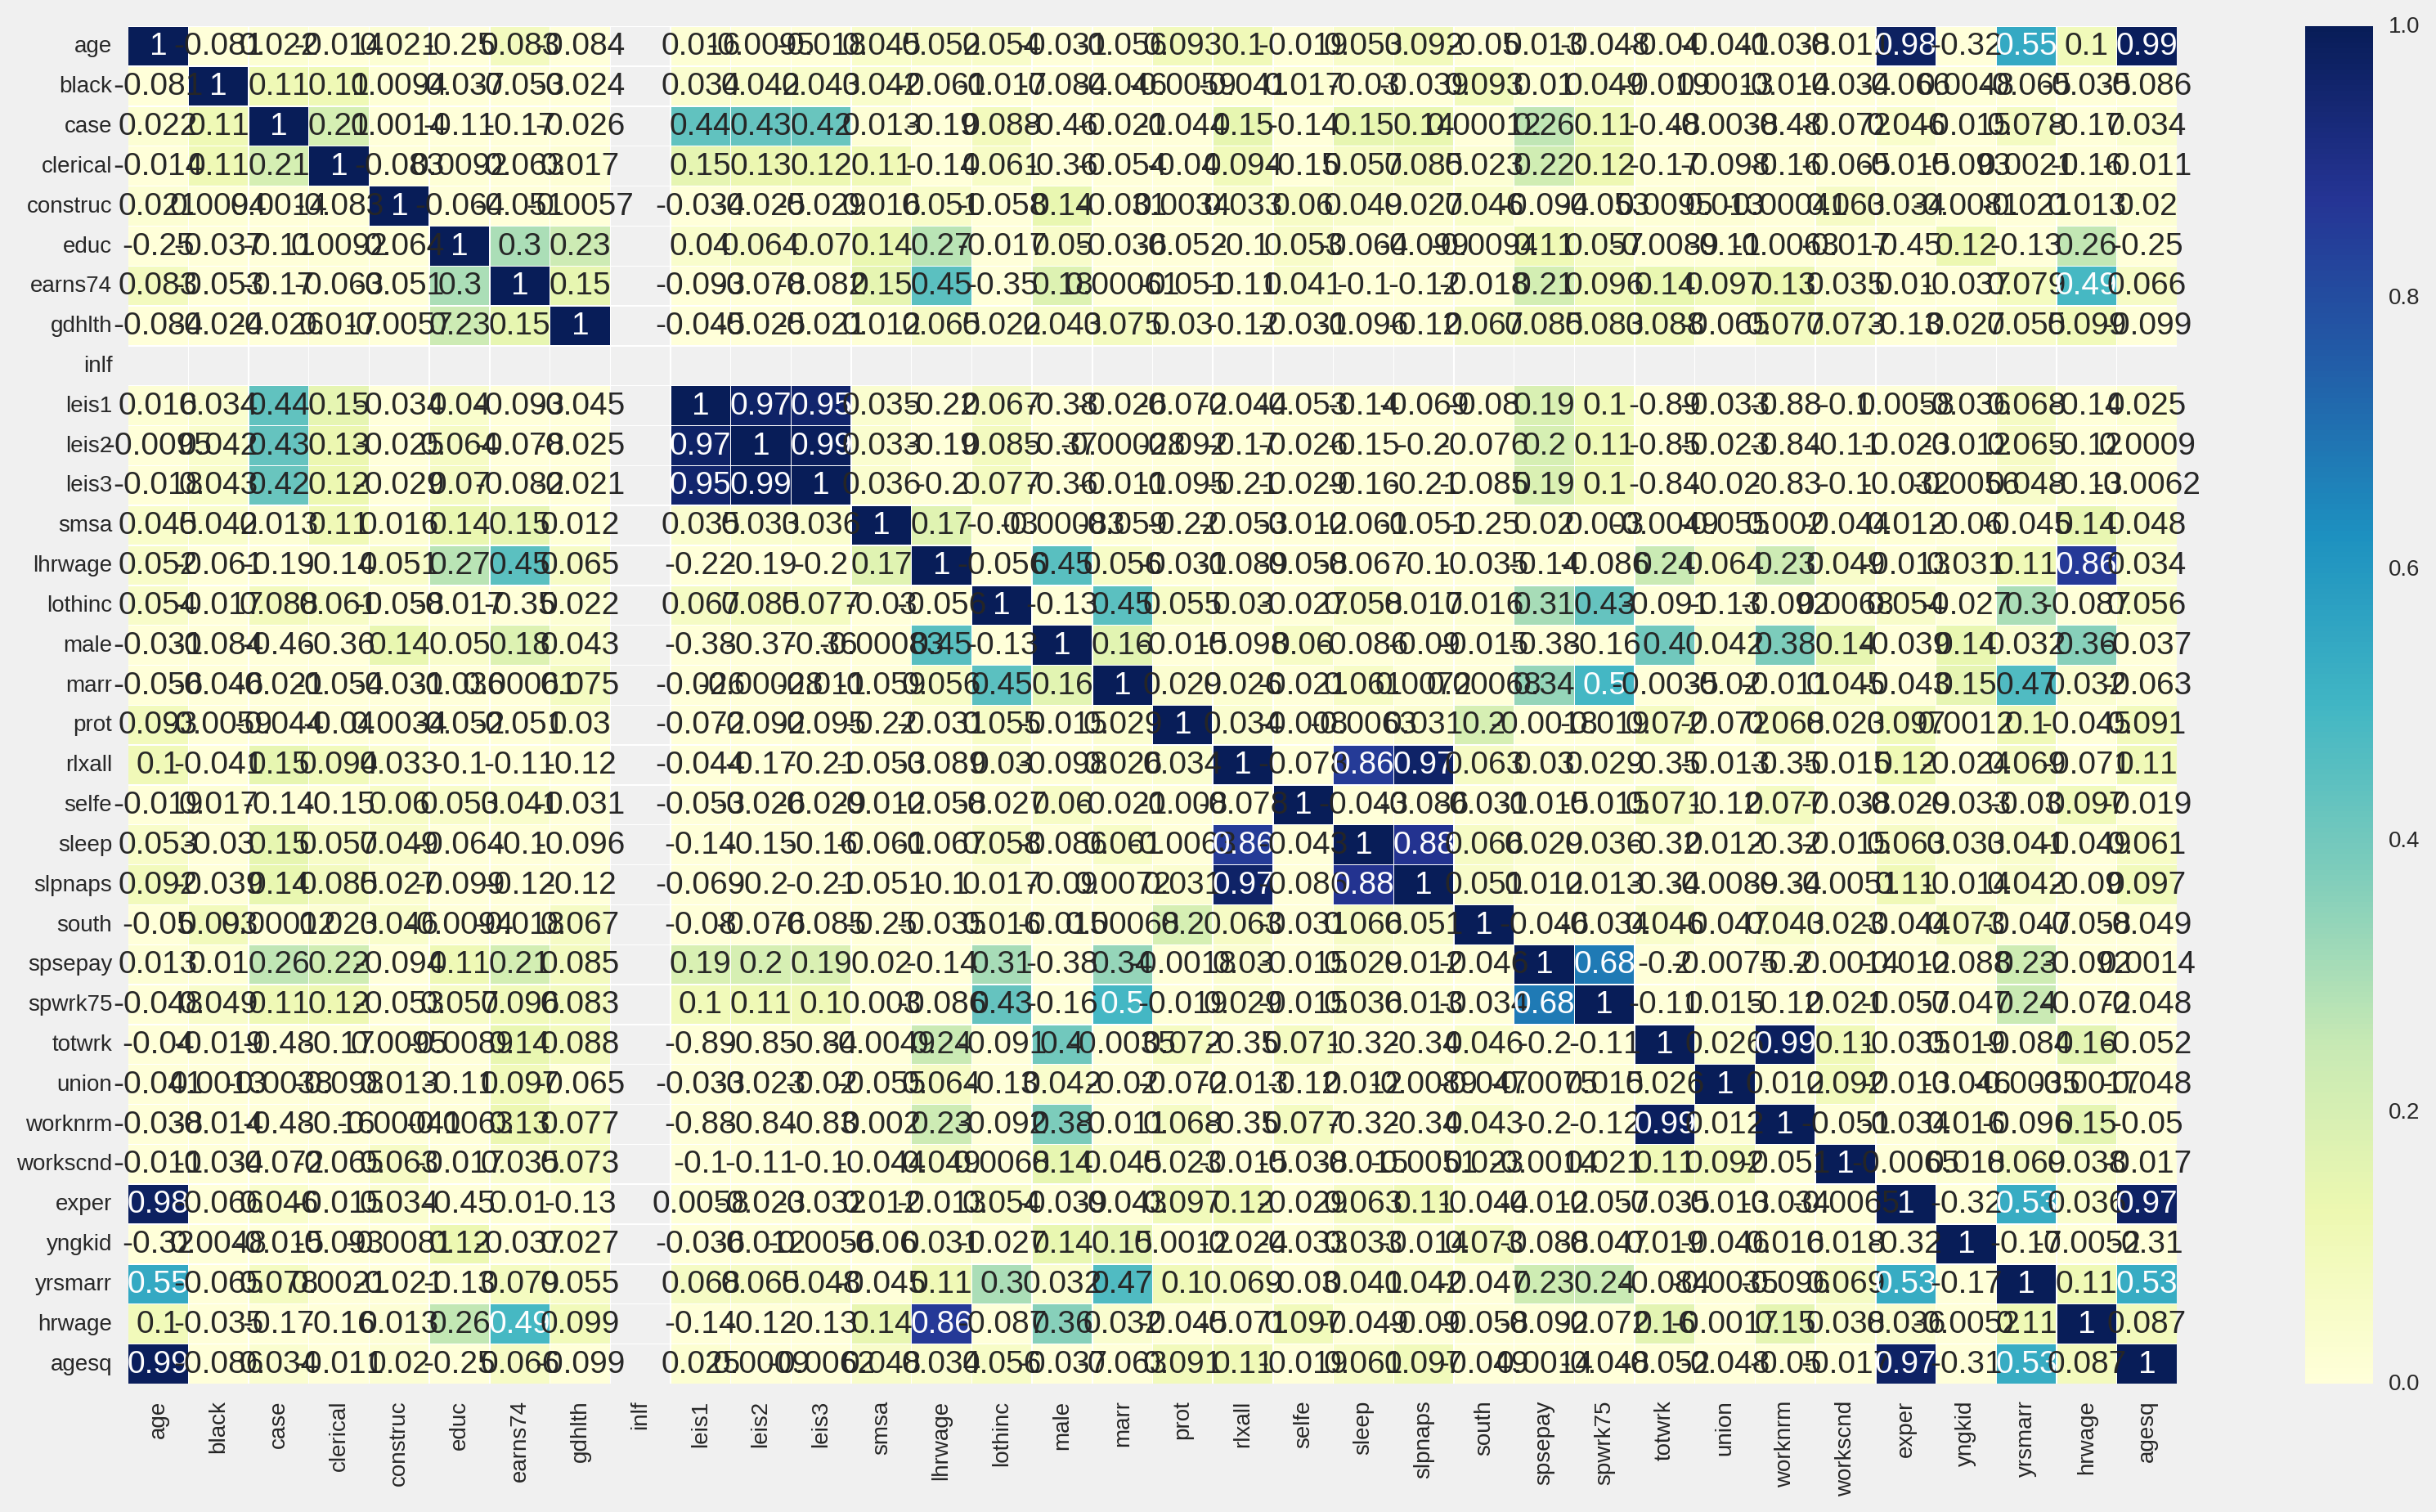

In [14]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

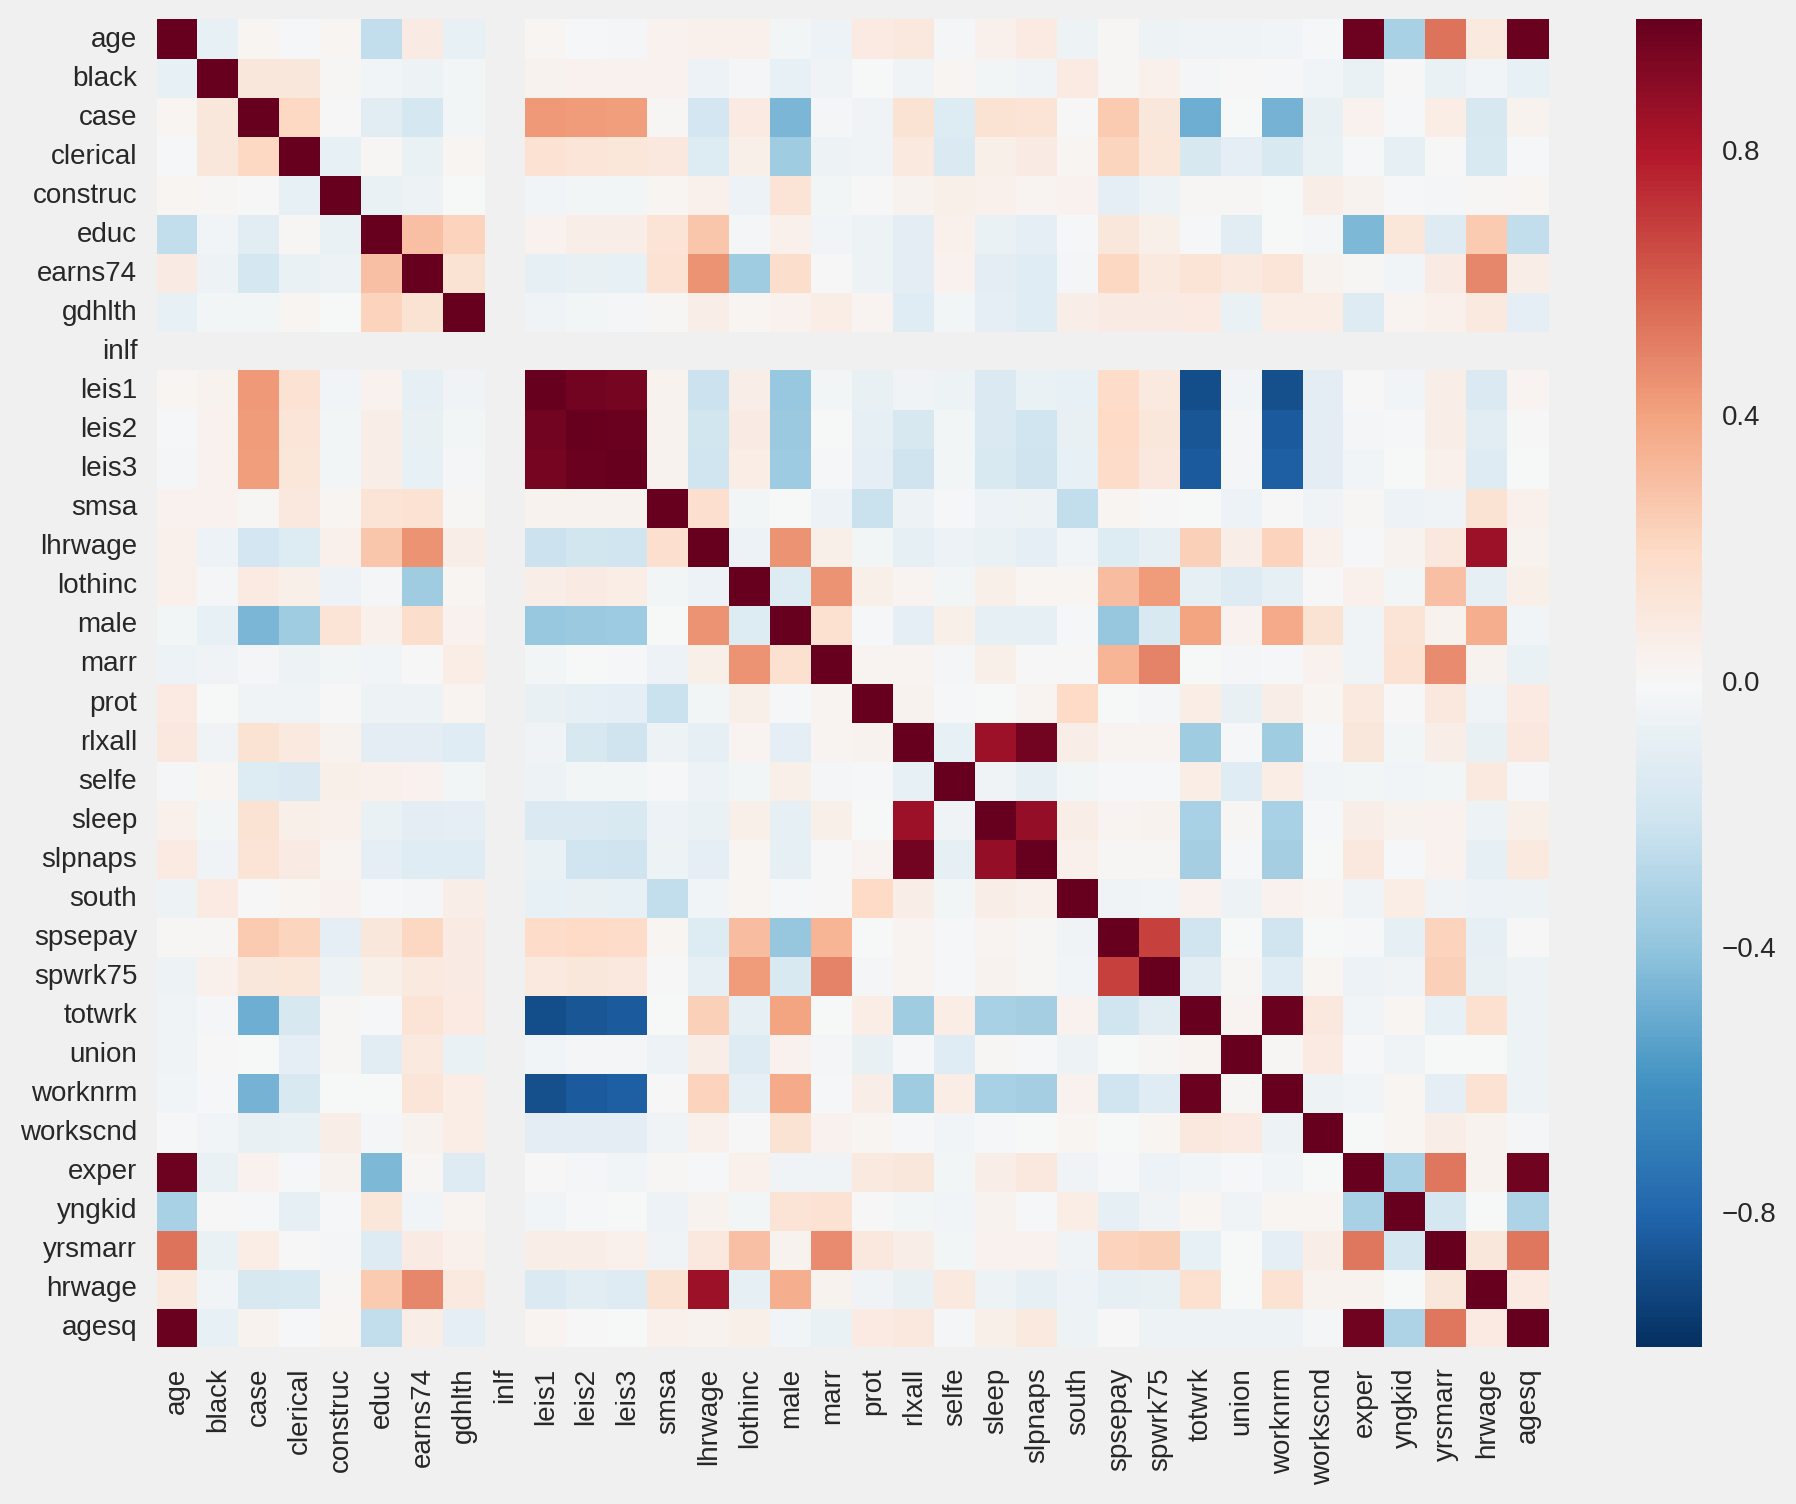

In [15]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(df.corr(), ax=ax)
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [47]:
#'''Define y and X'''
y = df['sleep'] 

X = df[["totwrk", "educ", "hrwage", "marr", "smsa", "yngkid", "spsepay"]]


print X.shape, y.shape

(532, 7) (532,)


In [48]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(372, 7) (372,)
(160, 7) (160,)


In [56]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm = linear_model.LinearRegression()
model = lm.fit(X_test, y_test)

In [57]:
## Print the coefficients, and R2

print ("R^2:", model.score(X_test, y_test))
print ("Coefficients:", model.coef_)
print ("Intercept:", model.intercept_)

('R^2:', 0.10299649963563529)
('Coefficients:', array([ -1.16497395e-01,  -6.55692868e+00,  -1.85048382e+00,
         7.54337491e+01,  -3.29138671e+01,   4.34760236e+01,
        -9.12861913e-03]))
('Intercept:', 3608.3221942127821)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

In [75]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

## 4.2.1 OLS
    
---

In [26]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='y ~ X', data=df).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     10.12
Date:                Mon, 20 Mar 2017   Prob (F-statistic):           6.66e-12
Time:                        19:26:19   Log-Likelihood:                -3947.8
No. Observations:                 532   AIC:                             7912.
Df Residuals:                     524   BIC:                             7946.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3677.9507    104.316     35.258      0.000    3473.022    3882.879
X[0]          -0.1561      0.020     -7.978      0.000      -0.195      -0.118
X[1]          -9.9382      7.033     -1.413      0.158     -23.755       3.878
X[2]           2.5287      5.101      0.496      0.620      -7.493      12.550
X[3]          72.5981     50.215      1.446      0.149     -26.050     171.246
X[4]         -44.5532     36.889     -1.208      0.228    -117.021      27.914
X[5]          37.3938     52.726      0.709      0.479     -66.186     140.974
X[6]          -0.0028      0.003     -1.036      0.301      -0.008       0.002
==============================================================================
Omnibus:                       17.873   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.175
Skew:                          -0.176   Prob(JB):                     3.79e-08
Kurtosis:                       4.191   Cond. No.                     5.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4.2.2 Regularization
    
---

In [82]:
lm.fit(X_test, y_test)
## predict values => you predict on the test, I am predict on the train so we can see how the model performs
ytrain_pred = lm.predict(X_train)
ytest_pred = lm.predict(X_test)
# print(lr.coef_)
# print "====\n"


## Cross validate = 10, this shuffles your data 10 times
from sklearn.cross_validation import cross_val_score
linreg_scores = cross_val_score(lm, X_train, y_train, cv=10)

## Print the R^2
print linreg_scores
print "Average R^2 OLS score: %.3f" % (np.mean(linreg_scores))

[ 0.15944485 -0.13824161 -0.06976812  0.30192201 -0.16114752  0.05460704
 -0.07992248  0.17706395  0.13388989  0.05744225]
Average R^2 OLS score: 0.044


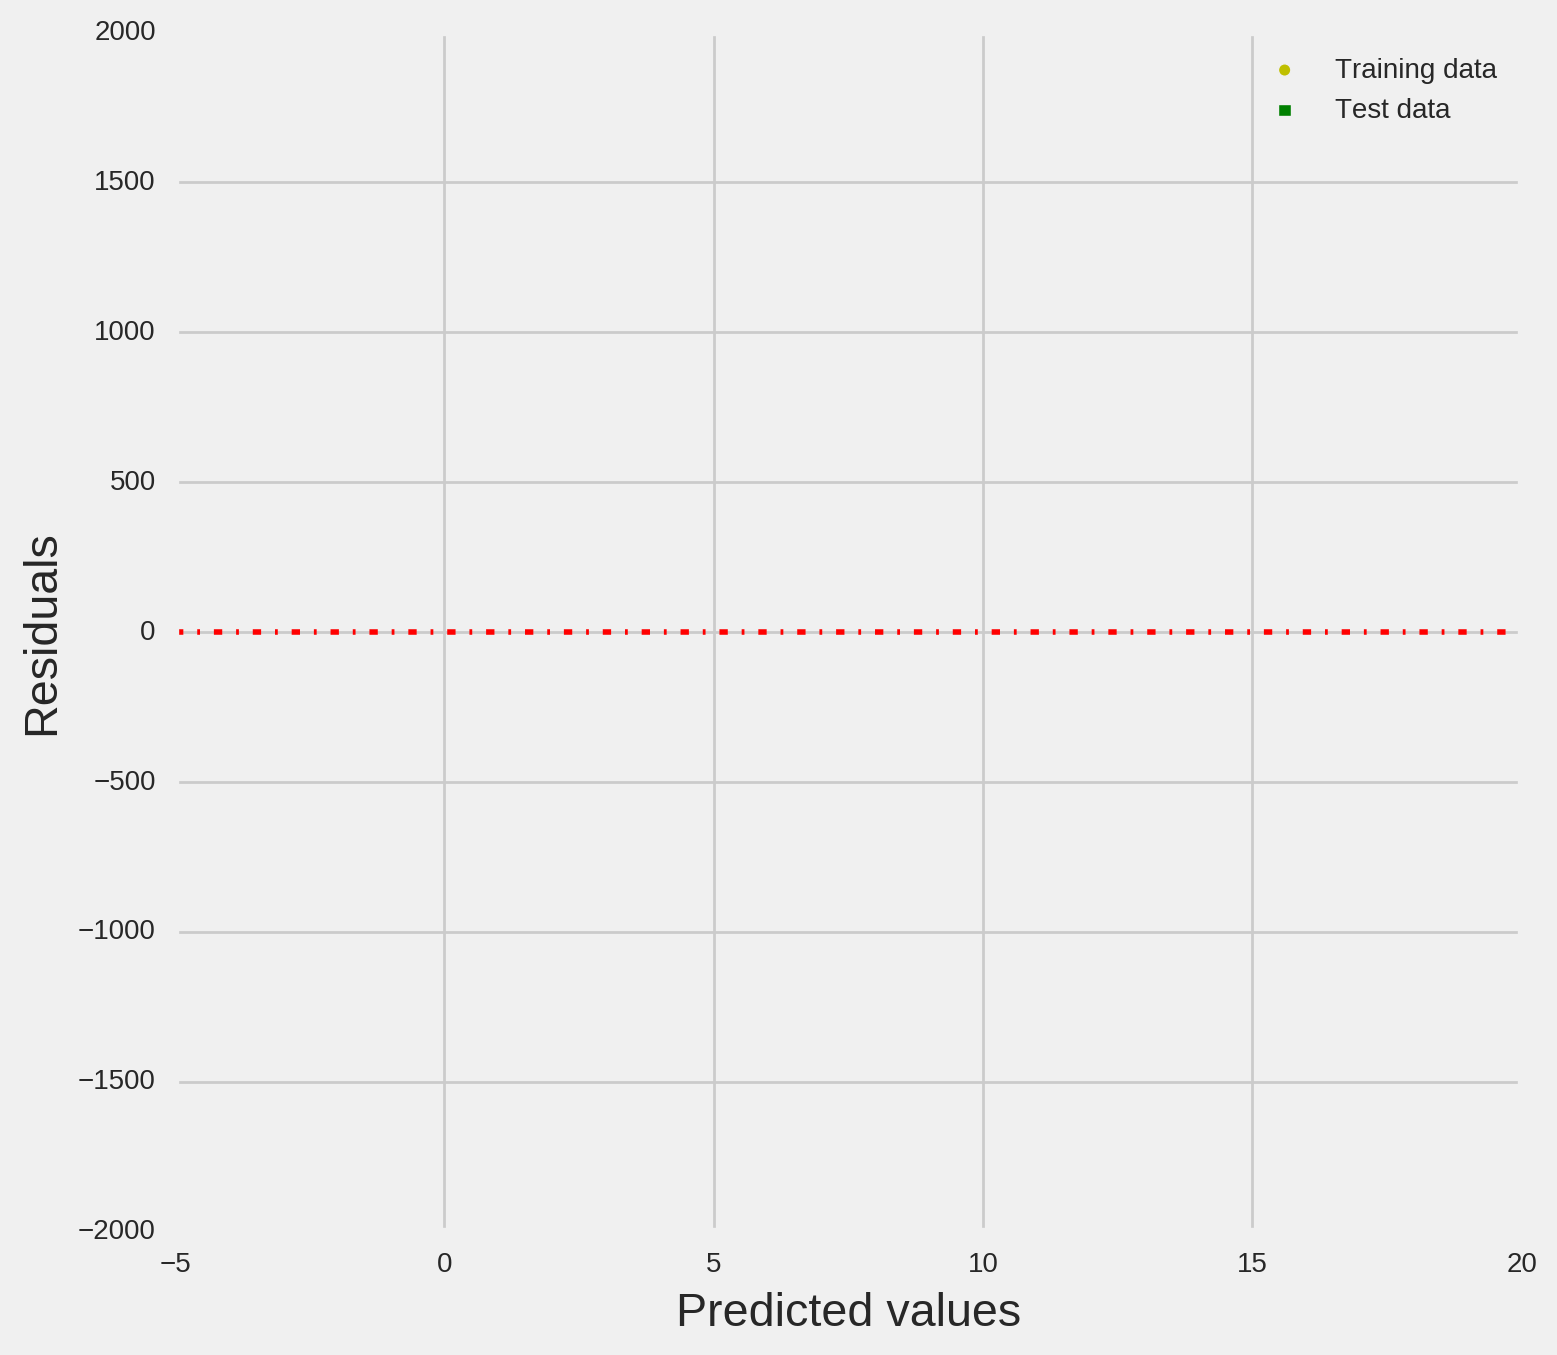

In [80]:
fig = plt.figure(figsize=(8,7))

plt.scatter(ytrain_pred,  ytrain_pred - y_train,
            c='y', marker='o', label='Training data')

plt.scatter(ytest_pred,  ytest_pred - y_test,
            c='g', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=-5, xmax=20, lw=2, linestyles= '-.', color='red')
plt.xlim([-5, 20])
plt.tight_layout()

plt.show()

In [83]:
## Use the R^2 and MSE to see how the model is performing on train and test data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE - OLS train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred),
        mean_squared_error(y_test, ytest_pred)))
print('R^2 0LS train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred),
        r2_score(y_test, ytest_pred)))

MSE - OLS train: 170586.108, test: 160344.648
R^2 0LS train: 0.093, test: 0.103


In [78]:
ridge_alphas = np.logspace(0, 5, 100)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_test, y_test)
print (optimal_ridge.alpha_)

100000.0


In [84]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(X_train, y_train)
ytrain_pred_ridge = ridge.predict(X_train)
ytest_pred_ridge = ridge.predict(X_test)
# print(ridge.coef_)
# print "=====\n"


## Cross validate = 10
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
## Print the R^2
print ridge_scores
print "Average R^2 Ridge score: %.3f" % (np.mean(ridge_scores))

[ 0.15050126 -0.1711409  -0.01320213  0.29421769 -0.20099549  0.08272438
 -0.10716019  0.18818496  0.16628745  0.08013941]
Average R^2 Ridge score: 0.047


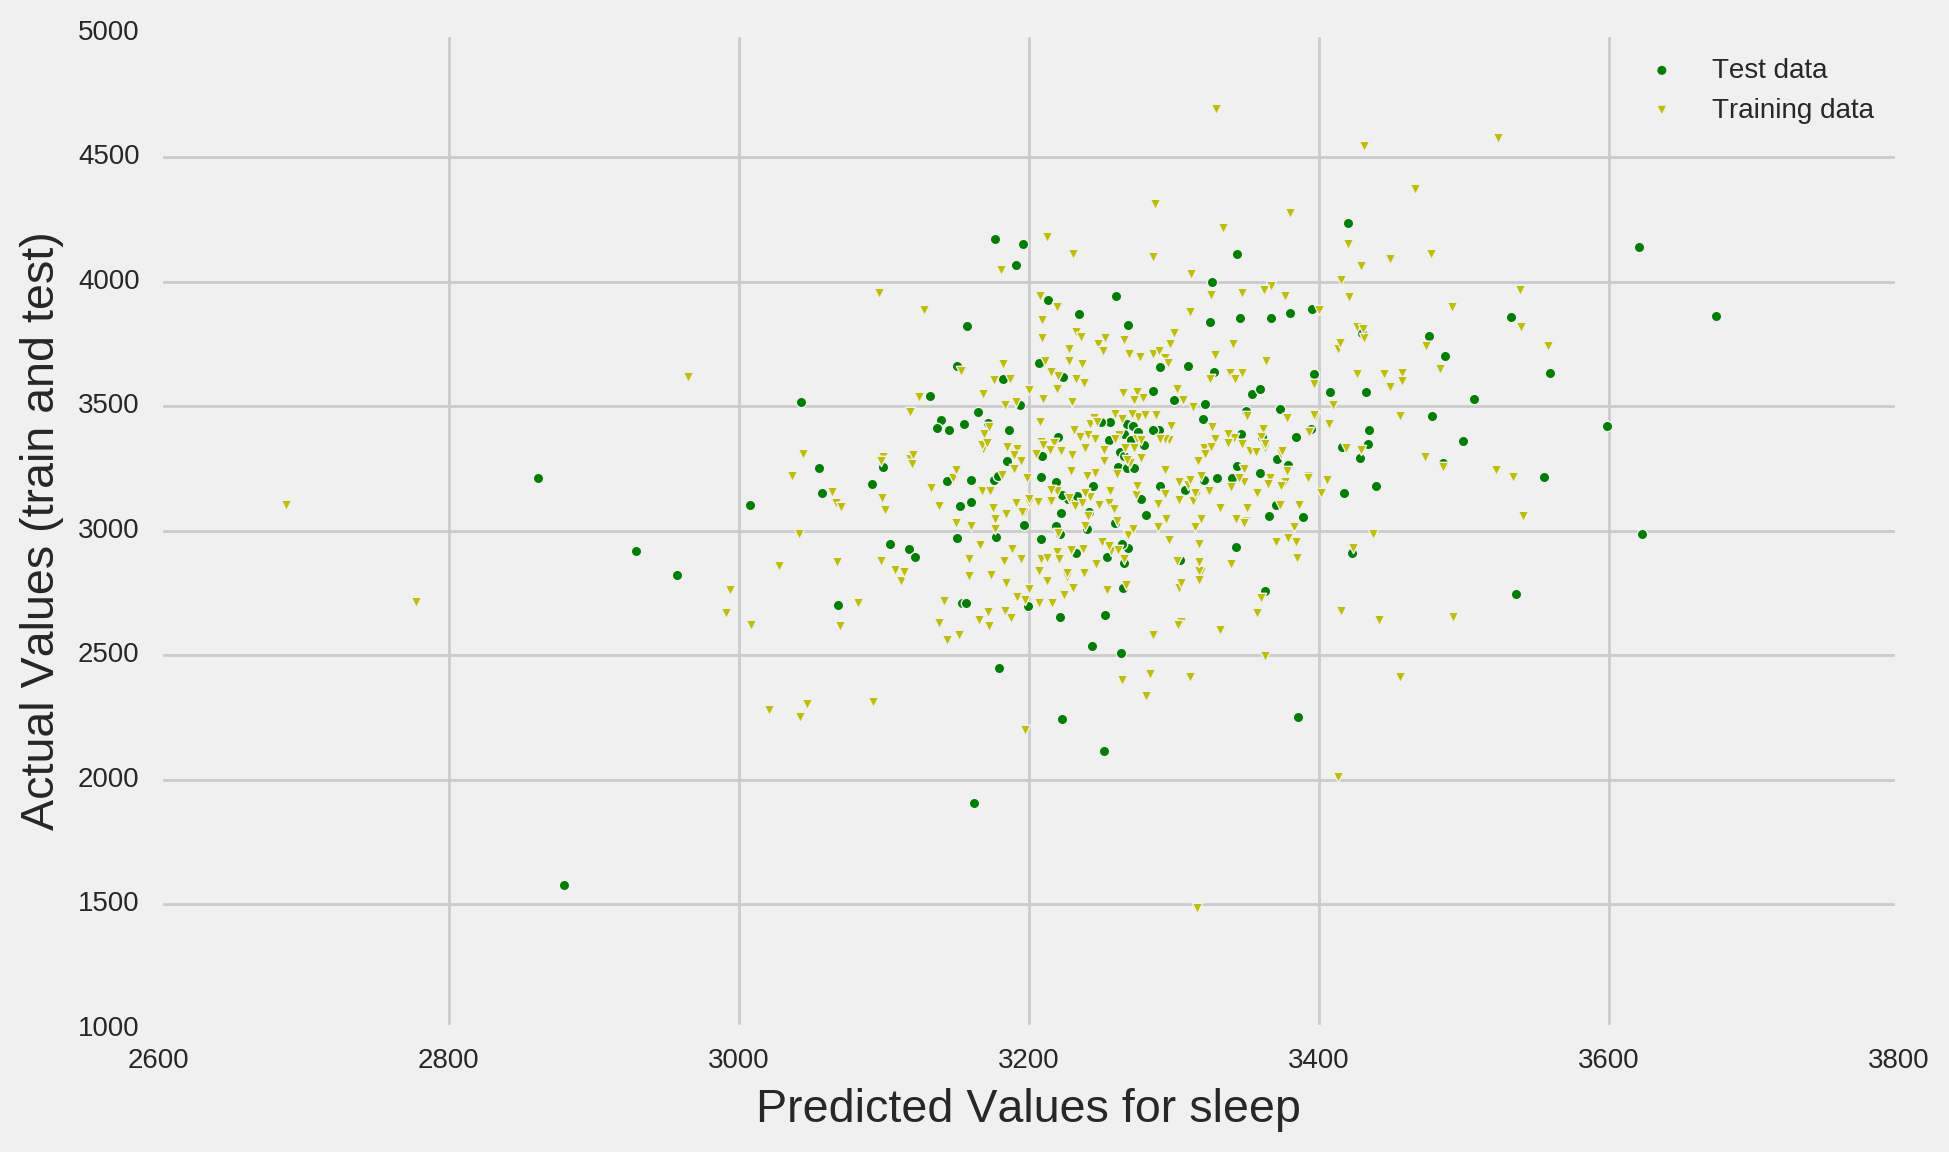

In [85]:
## Here we are plotting the predicted values for our train and test data set
fig = plt.figure(figsize=(10,6))
plt.scatter(ytest_pred, y_test, s=14, c='g', marker='o', label='Test data')
plt.scatter(ytrain_pred, y_train, s=14, c='y', marker='v', label='Training data')
plt.xlabel("Predicted Values for sleep")
plt.ylabel("Actual Values (train and test)")
plt.legend(loc='upper right')
plt.show()
## looks like we have some outliers

## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [ ]:
## Seems as if the variable totwrk is the best predictor

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [88]:
#'''Define y and X'''
y = df['sleep'] 

X = df[["totwrk", "educ", "hrwage", "marr", "smsa", "yngkid", "spsepay"]]


print X.shape, y.shape

(532, 7) (532,)


In [89]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(372, 7) (372,)
(160, 7) (160,)


In [91]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [92]:
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 199 tasks       | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 449 tasks       | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    5.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [93]:
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 10}


best score -0.0134914756334


In [94]:
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [95]:
feature_importance(X, dtr_best)
# again totwork seems to be the most influential indicator, same as my ridge regression

,feature,importance
0,totwrk,0.824620
2,hrwage,0.102391
3,marr,0.072988
1,educ,0.000000
4,smsa,0.000000
5,yngkid,0.000000
6,spsepay,0.000000


In [98]:
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 2651.41666667,  3477.9375    ,  3290.95121951,  3191.11320755,
        3290.95121951,  3419.1969697 ,  3191.11320755,  3290.95121951,
        3191.11320755,  3191.11320755,  3191.11320755,  3290.95121951,
        3191.11320755,  2984.88461538,  3191.11320755,  3813.        ,
        3191.11320755,  3191.11320755,  2984.88461538,  3191.11320755,
        3191.11320755,  3191.11320755,  3191.11320755,  3191.11320755,
        3477.9375    ,  3477.9375    ,  3191.11320755,  3290.95121951,
        3290.95121951,  3290.95121951,  3290.95121951,  2984.88461538,
        3290.95121951,  3191.11320755,  3290.95121951,  3191.11320755,
        3290.95121951,  3290.95121951,  3290.95121951,  3191.11320755,
        3290.95121951,  3290.95121951,  3191.11320755,  2984.88461538,
        3290.95121951,  3477.9375    ,  3191.11320755,  3477.9375    ,
        3191.11320755,  3191.11320755,  3191.11320755,  3290.95121951,
        2651.41666667,  3813.        ,  3191.11320755,  3191.11320755,
      

In [102]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [103]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 153076.70, test data: 181541.96
R^2 Regression tree train data: 0.19, test data: -0.02


## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [99]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [100]:
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  49 tasks       | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 199 tasks       | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [104]:
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=4, max_leaf_nodes=6, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 4, 'max_leaf_nodes': 6, 'min_samples_split': 3, 'n_estimators': 100, 'max_depth': 3}


best score 0.0742187336259


In [105]:
feature_importance(X, rfr_best)
## this appears to be better, where as in the decision tree only totwrk seemed to be a reliable indicator

,feature,importance
0,totwrk,0.632992
2,hrwage,0.145868
1,educ,0.096619
6,spsepay,0.069649
3,marr,0.031939
5,yngkid,0.013236
4,smsa,0.009696


In [106]:
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 2912.46740877,  3472.18921763,  3315.71058424,  3138.07498503,
        3277.45830422,  3308.11696203,  3170.25450407,  3364.31177861,
        3150.59020796,  3262.32389445,  3205.23240042,  3326.88885879,
        3311.9349668 ,  3112.70745983,  3209.05135065,  3550.74938038,
        3153.63665694,  3104.57465457,  3186.15956969,  3149.79809739,
        3199.14697968,  3247.97978275,  3166.49793571,  3194.05066199,
        3453.66260956,  3530.378508  ,  3160.7524901 ,  3342.61661882,
        3354.66342017,  3266.45632213,  3206.84981446,  3159.70055207,
        3267.76063838,  3150.59020796,  3345.41873644,  3067.36853703,
        3426.71714597,  3342.60787611,  3252.01983156,  3167.74077396,
        3272.48195298,  3266.07727595,  3188.55076641,  3121.84378204,
        3336.61686734,  3477.05526464,  3216.4328395 ,  3464.19326506,
        3147.39774325,  3163.63480867,  3222.27330171,  3254.80916001,
        2951.52444786,  3478.8846839 ,  3208.96656242,  3217.35573497,
      

In [107]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)
## the R^2 goes up in the random forest on the train data and the test data.

MSE Random Forest Regression tree train data: 147152.16, test data: 168433.33
R^2 Random Forest Regression tree train data: 0.22, test data: 0.06


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

In [ ]:
# didnt get to this

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS:

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS: